<div class="alert alert-block alert-info">
    <b>Note:</b> The goal of this notebook is to show you how to work with the <b>bayes-toolbox</b> when using multiple regression analyses. This is an adaptation of Jordi Warmenhoven's PyMC3 port of Chapter 18 of John Kruschke's textbook "Doing Bayesian Data Analysis: A Tutorial with R, JAGS, and Stan" (https://github.com/JWarmenhoven/DBDA-python). Please note that the code has been updated to make use of PyMC4 and that this does not (yet) include all of the examples from the original. </div>

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

# Import bayes-toolbox
import bayes_toolbox.glm as bg

from IPython.display import Image

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v4.3.0


In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.95

In [3]:
df = pd.read_csv("data/Guber1999data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      50 non-null     object 
 1   Spend      50 non-null     float64
 2   StuTeaRat  50 non-null     float64
 3   Salary     50 non-null     float64
 4   PrcntTake  50 non-null     int64  
 5   SATV       50 non-null     int64  
 6   SATM       50 non-null     int64  
 7   SATT       50 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 3.2+ KB


In [4]:
df.head()

,State,Spend,StuTeaRat,Salary,PrcntTake,SATV,SATM,SATT
0,Alabama,4.405,17.2,31.144,8,491,538,1029
1,Alaska,8.963,17.6,47.951,47,445,489,934
2,Arizona,4.778,19.3,32.175,27,448,496,944
3,Arkansas,4.459,17.1,28.934,6,482,523,1005
4,California,4.992,24.0,41.078,45,417,485,902


In [5]:
X = df[["Spend", "PrcntTake"]]
y = df["SATT"]

### Graphical model

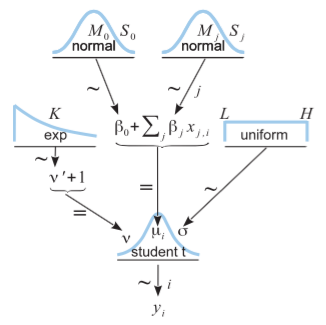

In [6]:
Image("images/fig18_4.png", width=400)

In [7]:
# Call your Bayesian Statistics Toolbox (BST) function
model1, idata1 = bg.multiple_linear_regression(X, y, n_draws=5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [zbeta0, zbeta, nu_minus_one, nu, zsigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 32 seconds.


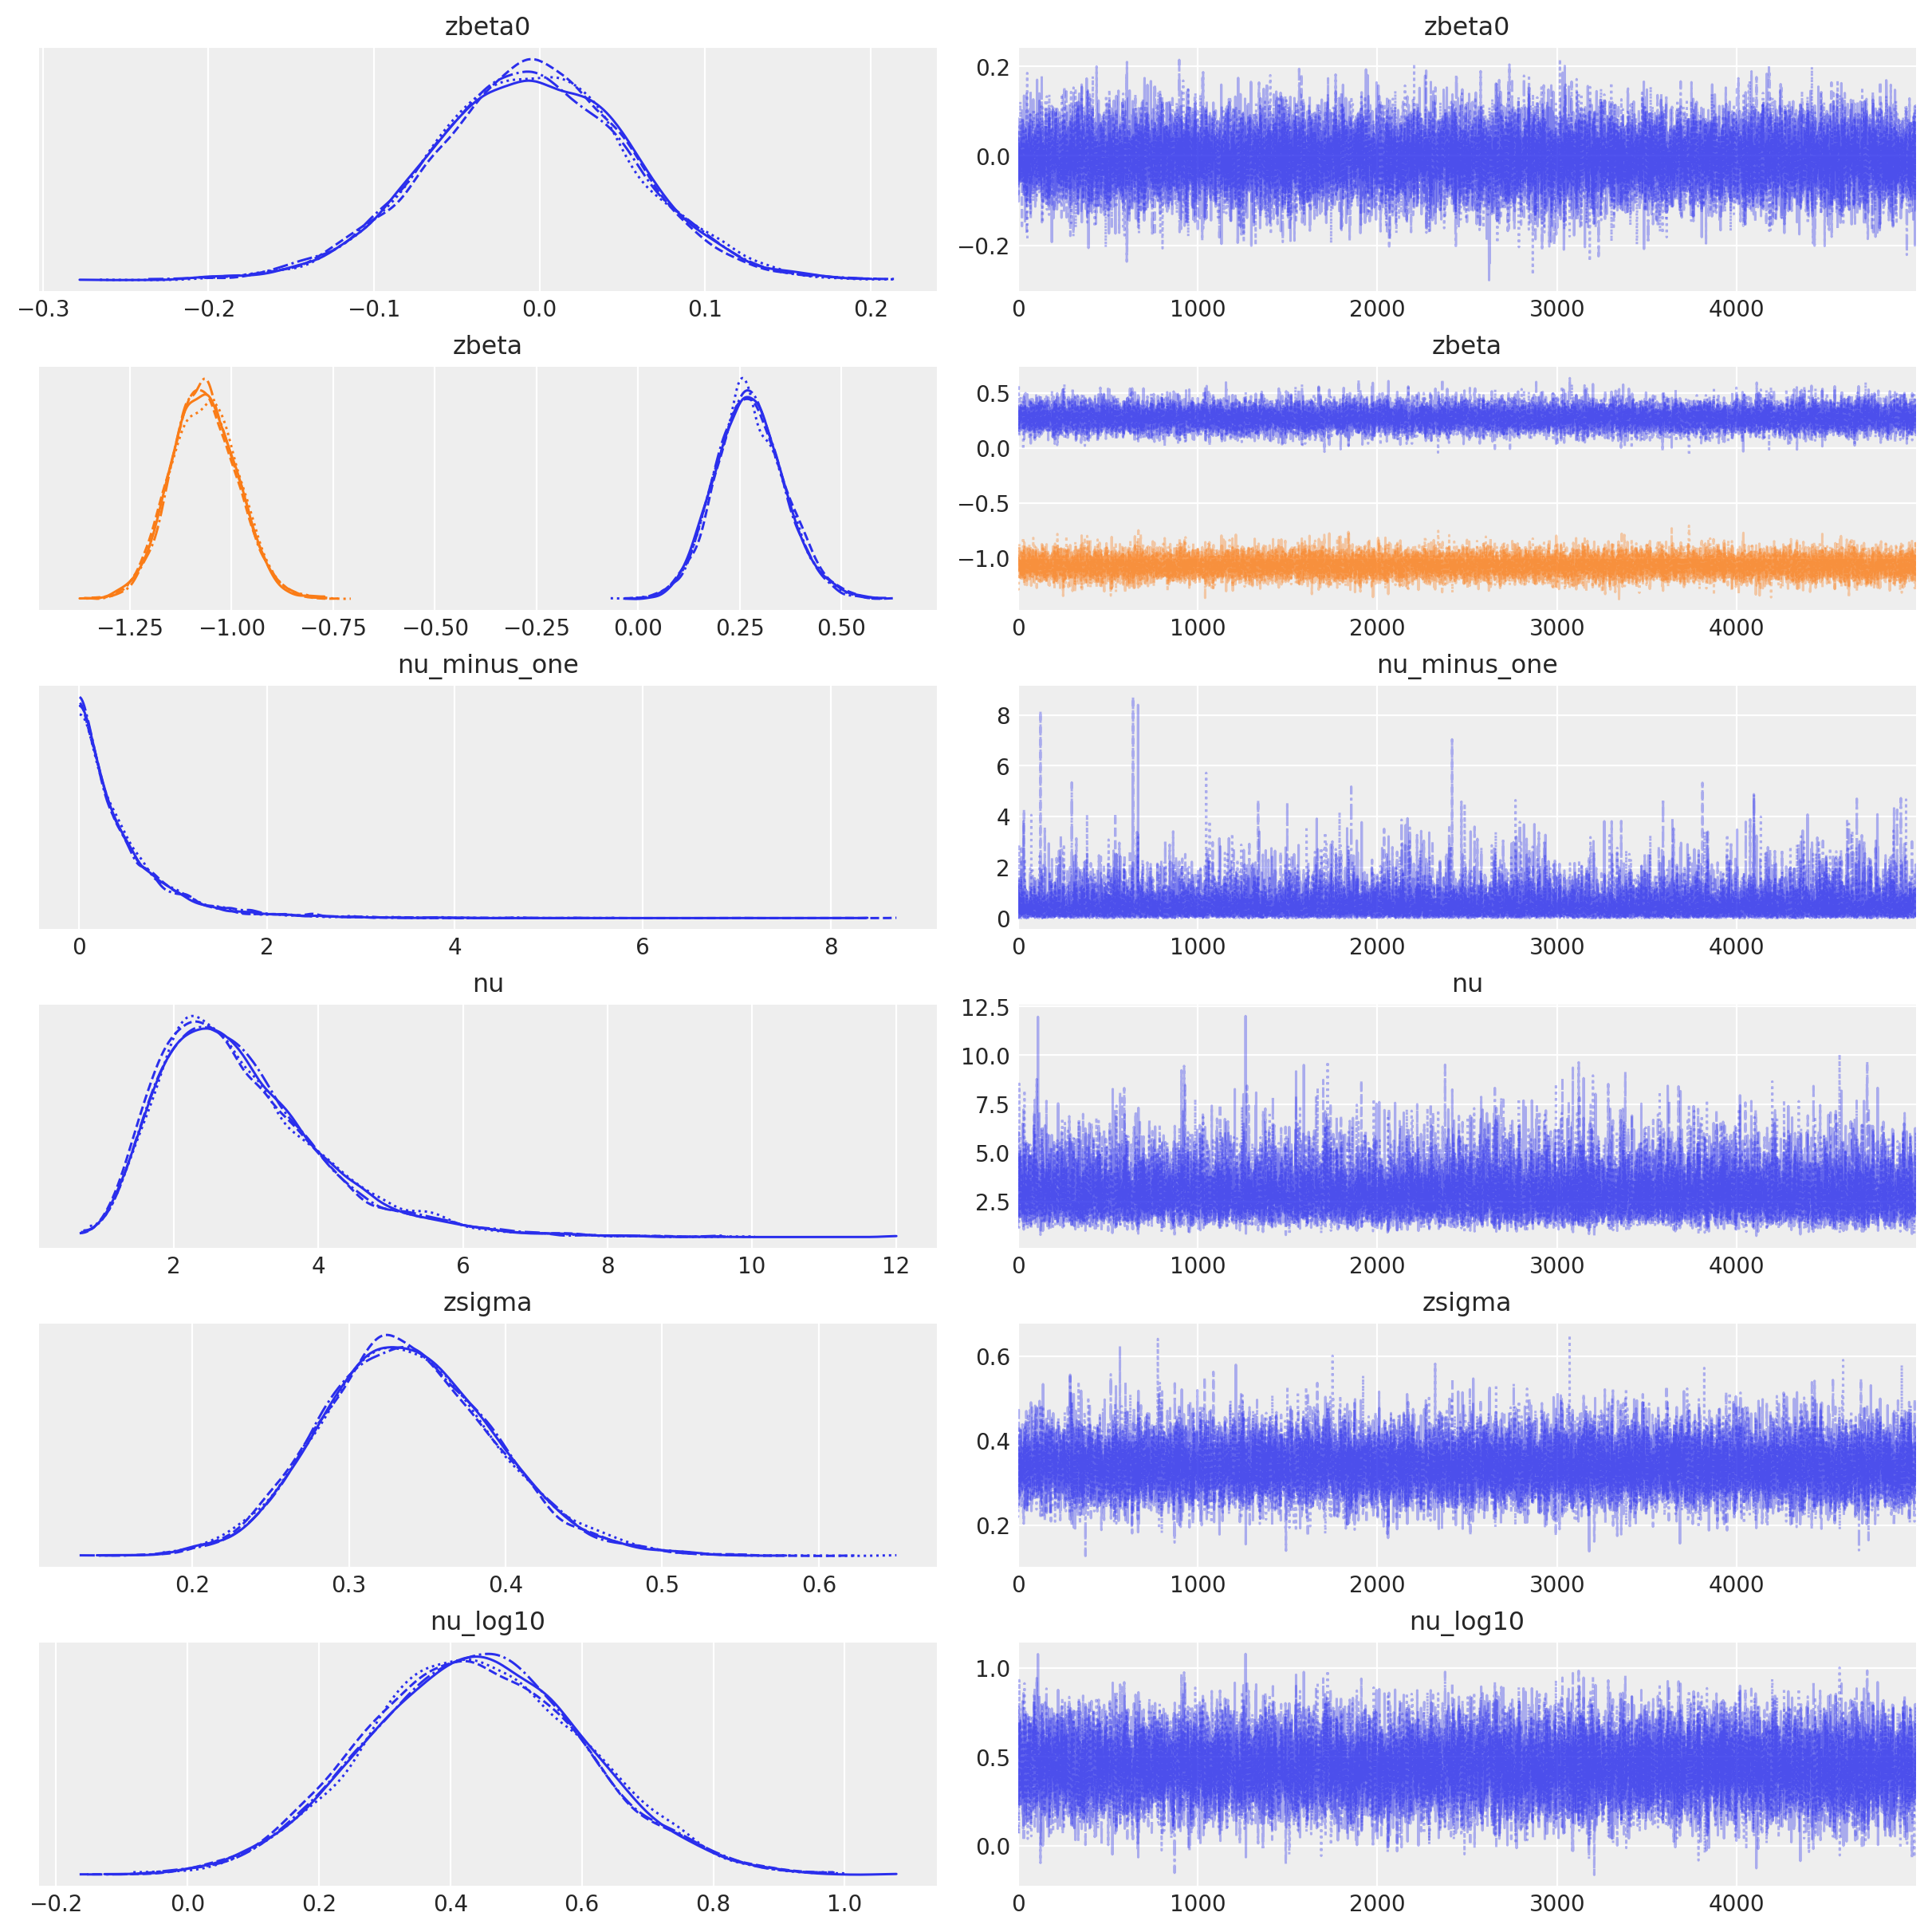

In [8]:
pm.plot_trace(idata1);

In [9]:
post1 = az.extract(idata1.posterior)

In [10]:
# Return parameters to raw data scale
(
    post1["beta0"],
    post1["beta"],
    post1["sigma"],
) = bg.unstandardize_multiple_linreg_parameters(
    post1["zbeta0"], post1["zbeta"], post1["zsigma"], X, y
)

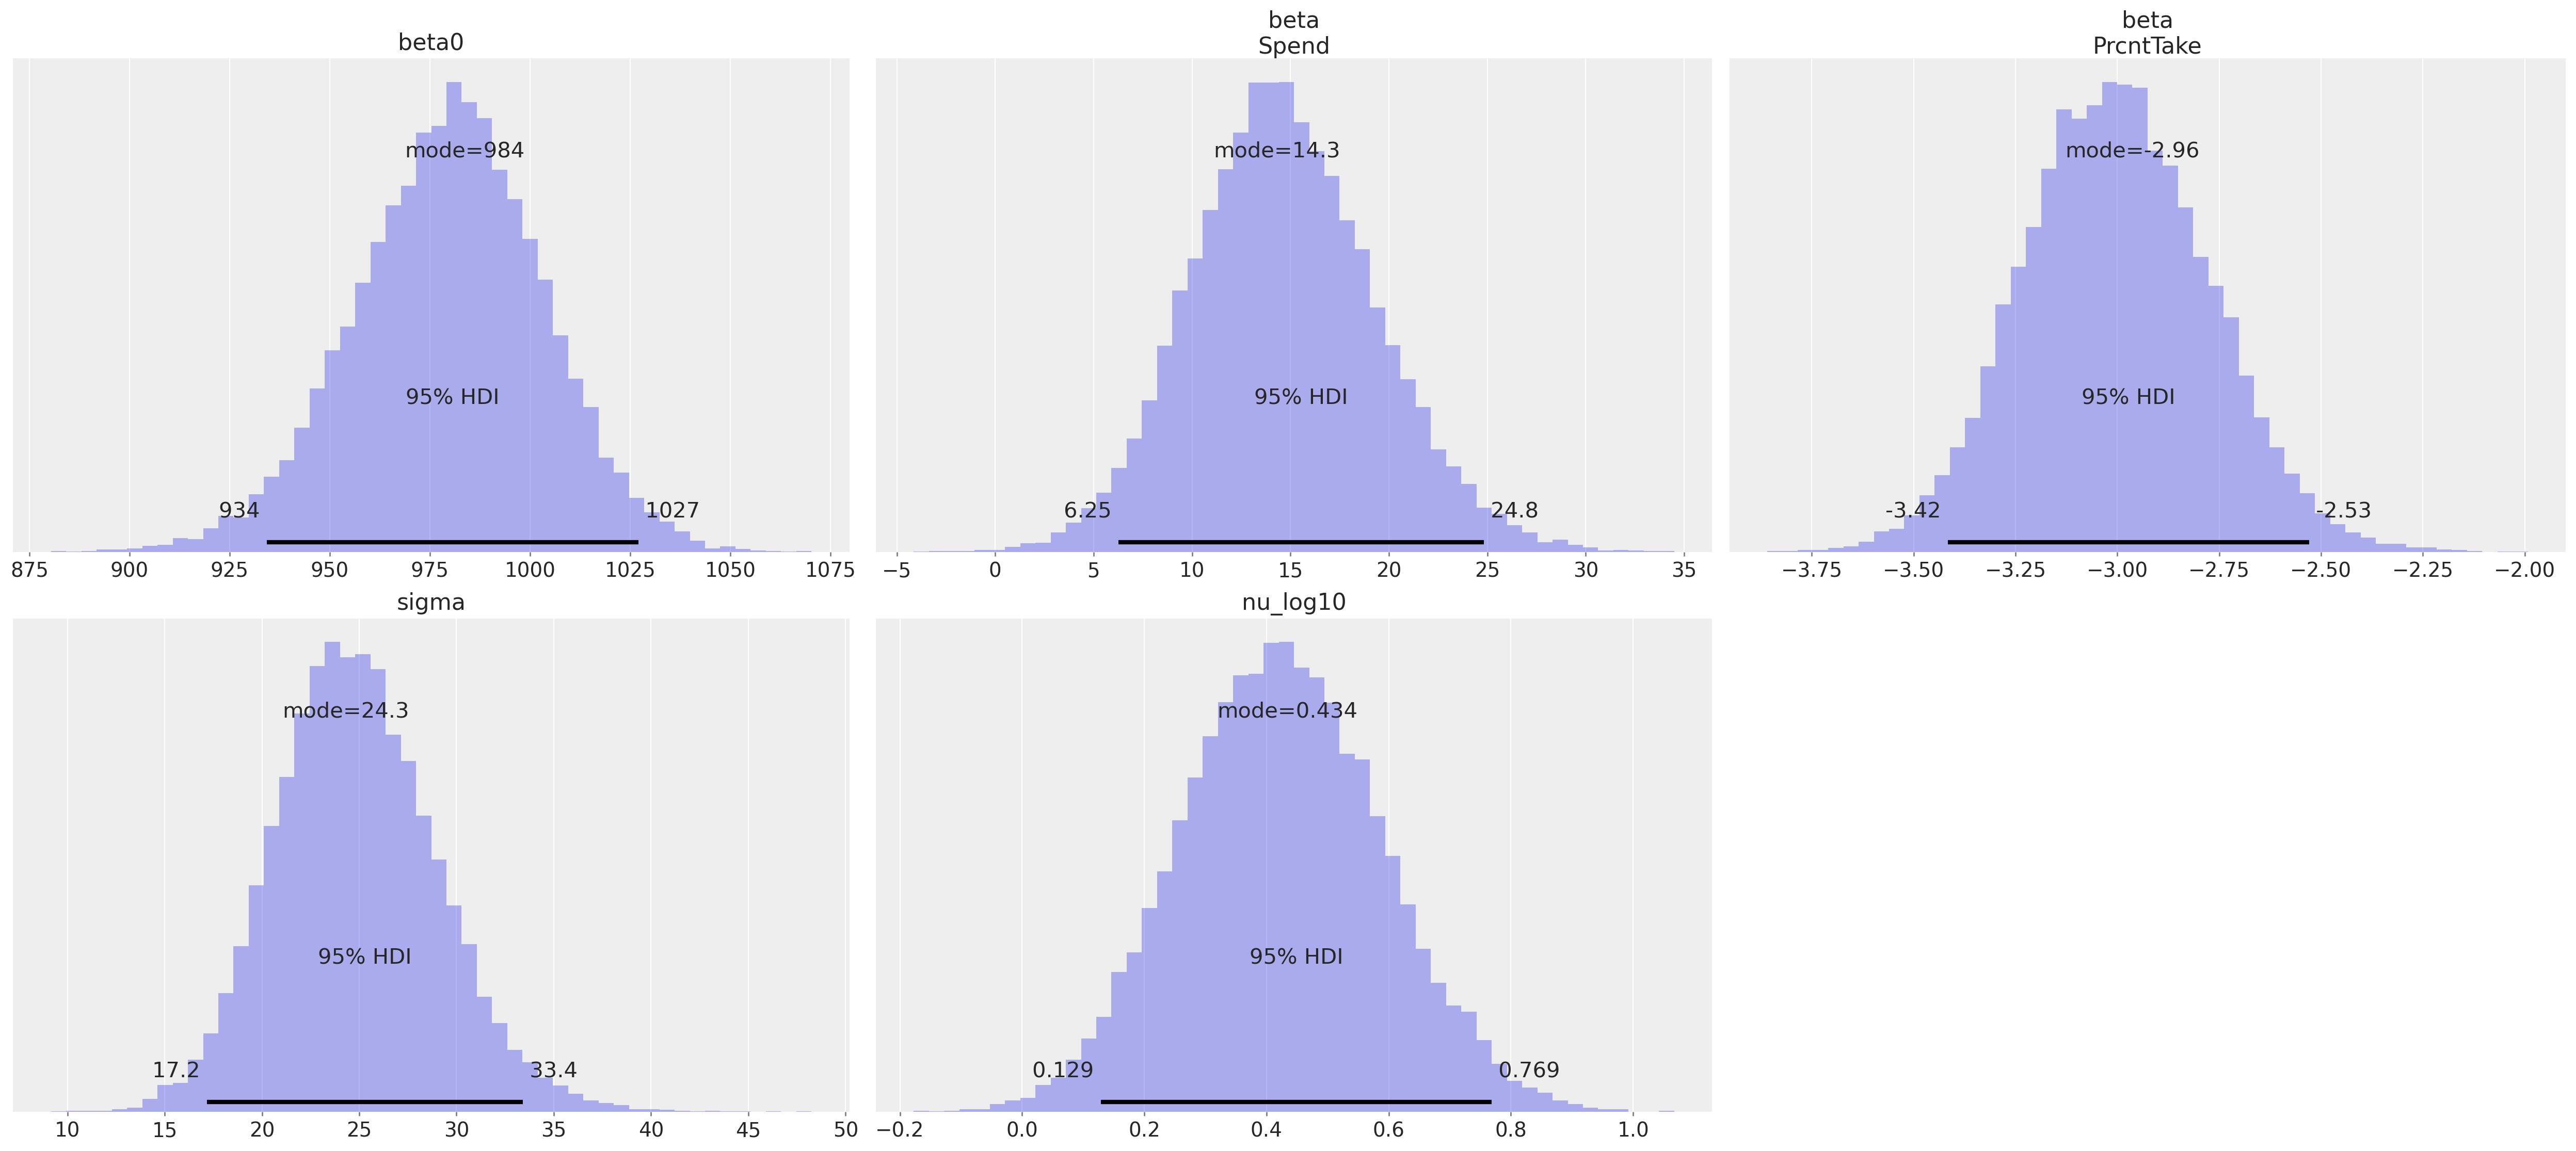

In [11]:
# Note that we have to pass "sample" to the combine_dims argument since we stacked
# our chains
az.plot_posterior(
    post1,
    var_names=["beta0", "beta", "sigma", "nu_log10"],
    combine_dims={"sample"},
    point_estimate="mode",
    round_to=3,
    kind="hist",
    bins=50,
);